In [19]:
from nltk.metrics import edit_distance
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')


df_train = pd.read_csv("../input/train.csv.zip", encoding="ISO-8859-1")
df_test = pd.read_csv("../input/test.csv.zip", encoding="ISO-8859-1")
attribute_data = pd.read_csv('../input/attributes.csv.zip')
df_pro_desc = pd.read_csv('../input/product_descriptions.csv.zip')


num_train = df_train.shape[0]

# def str_stemmer(s):
#     return " ".join([stemmer.stem(word) for word in s.lower().split()])

def str_common_word(str1, str2):
    return sum(int(str2.find(word)>=0) for word in str1.split())



df_all = pd.concat((df_train, df_test), axis=0, ignore_index=True, sort=False)

df_all = pd.merge(df_all, df_pro_desc, how='left', on='product_uid')

In [2]:
df_all.head(10)

id                                      product_title  product_uid  \
0   2                  Simpson Strong-Tie 12-Gauge Angle       100001   
1   3                  Simpson Strong-Tie 12-Gauge Angle       100001   
2   9  BEHR Premium Textured DeckOver 1-gal. #SC-141 ...       100002   
3  16  Delta Vero 1-Handle Shower Only Faucet Trim Ki...       100005   
4  17  Delta Vero 1-Handle Shower Only Faucet Trim Ki...       100005   
5  18  Whirlpool 1.9 cu. ft. Over the Range Convectio...       100006   
6  20  Whirlpool 1.9 cu. ft. Over the Range Convectio...       100006   
7  21  Whirlpool 1.9 cu. ft. Over the Range Convectio...       100006   
8  23  Lithonia Lighting Quantum 2-Light Black LED Em...       100007   
9  27  House of Fara 3/4 in. x 3 in. x 8 ft. MDF Flut...       100009   

   relevance           search_term  \
0       3.00         angle bracket   
1       2.50             l bracket   
2       3.00             deck over   
3       2.33      rain shower head   
4       2.67    shower only faucet   
5       3.00        convection otr   
6       2.67  microwave over stove   
7       3.00            microwaves   
8       2.67       emergency light   
9       3.00               mdf 3/4   

                                 product_description  
0  Not only do angles make joints stronger, they ...  
1  Not only do angles make joints stronger, they ...  
2  BEHR Premium Textured DECKOVER is an innovativ...  
3  Update your bathroom with the Delta Vero Singl...  
4  Update your bathroom with the Delta Vero Singl...  
5  Achieving delicious results is almost effortle...  
6  Achieving delicious results is almost effortle...  
7  Achieving delicious results is almost effortle...  
8  The Quantum Adjustable 2-Light LED Black Emerg...  
9  Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...

text cleaning

In [20]:
import string
import re
import nltk



ps = nltk.stem.PorterStemmer()
wn = nltk.WordNetLemmatizer()

stopwords = nltk.corpus.stopwords.words('english')

def remove_punctuation(text):
    txt = ''.join(character for character in text if character not in string.punctuation)
    return txt

def tokenization(text, stopwords = None):
    tokens = re.split('\W+', text)
    if stopwords:
        tokens = [token for token in tokens if token not in stopwords]
    return tokens
        
    
def stemming(tokens):
    new_tokens = list(map(ps.stem, tokens))
#     new_tokens = [ps.stem(token) for token in tokens]
    return new_tokens

def lemmatizing(tokens):
    new_tokens = list(map(wn.lemmatize, tokens))
    return new_tokens

In [21]:
from nltk.corpus import brown, stopwords
from nltk.cluster.util import cosine_distance
 
def sentence_similarity(sent1, sent2, stopwords=None):
    sent1 = sent1.split(' ')
    sent2 = sent2.split(' ')
    if stopwords is None:
        stopwords = []
 
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
 
    all_words = list(set(sent1 + sent2))
 
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
 
    # build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1
 
    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1
 
    return 1 - cosine_distance(vector1, vector2)

In [22]:
from textblob import TextBlob

# df_all['search_term'] = df_all['search_term'].apply(lambda x:str_stem(x))
# df_all['product_title'] = df_all['product_title'].apply(lambda x:str_stem(x))

# df_all['product_description'] = df_all['product_description'].apply(lambda x:str_stem(x))

# def memoize(f):
#     memo = {}
#     def helper(x):
#         if x not in memo:            
#             memo[x] = f(x)
#         return memo[x]
#     return helper
  
  
# @memoize
# def correct_misspell(word):
#     return str(TextBlob(word).correct())



df_all['search_term'] = df_all['search_term'].apply(lambda x:''.join(lemmatizing(x)))
df_all['product_title'] = df_all['product_title'].apply(lambda x:''.join(lemmatizing(x)))

df_all['product_description'] = df_all['product_description'].apply(lambda x:''.join(lemmatizing(x)))


miss spell words correction

In [ ]:
# from textblob import TextBlob

# df_all['search_term'] = df_all['search_term'].map(lambda x: str())
# df_all['product_title'] = df_all['product_title'].map(lambda x: str(TextBlob(x).correct()))

# df_all['product_description'] = df_all['product_description'].map(lambda x: str(TextBlob(x).correct()))


# df_all['search_term'] = df_all['search_term'].apply(correct_misspell)
# df_all['product_title'] = df_all['product_title'].apply(correct_misspell)

# df_all['product_description'] = df_all['product_description'].apply(correct_misspell)

In [ ]:
# from textblob import Word
df_all['search_term'] = df_all['search_term'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df_all['product_title'] = df_all['product_title'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df_all['product_description'] = df_all['product_description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


In [23]:
df_all[df_all.search_term.str.count('\w+')<1]

Empty DataFrame
Columns: [id, product_uid, product_title, search_term, relevance, product_description]
Index: []

In [ ]:
df_all['frequency_search_product_desc'] = df_all.loc[:, ["search_term","product_description"]].apply(lambda row:str_common_word(*row), axis=1)
df_all['frequency_search_title'] = df_all.loc[:, ["search_term","product_title"]].apply(lambda row:str_common_word(*row), axis=1)

df_all['frequ_search_with_respect_to_sum'] = df_all.loc[:, ["frequency_search_product_desc","frequency_search_title"]].apply(lambda row:row[0]+row[1], axis=1)

In [13]:
df_all = df_all.drop('search_term_l	product_title_l	product_description_l'.split('\t'),axis=1)

In [24]:
df_all[df_all.relevance.isnull()]

id  product_uid  \
74067        1       100001   
74068        4       100001   
74069        5       100001   
74070        6       100001   
74071        7       100001   
74072        8       100001   
74073       10       100003   
74074       11       100003   
74075       12       100003   
74076       13       100004   
74077       14       100005   
74078       15       100005   
74079       19       100006   
74080       22       100006   
74081       24       100008   
74082       25       100009   
74083       26       100009   
74084       28       100010   
74085       29       100010   
74086       30       100010   
74087       31       100010   
74088       32       100010   
74089       33       100010   
74090       36       100011   
74091       39       100011   
74092       40       100011   
74093       41       100011   
74094       42       100011   
74095       43       100011   
74096       44       100011   
...        ...          ...   
240730  240731       224399   
240731  240732       224400   
240732  240733       224401   
240733  240734       224402   
240734  240735       224403   
240735  240736       224404   
240736  240737       224405   
240737  240738       224406   
240738  240739       224407   
240739  240740       224408   
240740  240741       224409   
240741  240742       224410   
240742  240743       224411   
240743  240744       224412   
240744  240745       224413   
240745  240746       224414   
240746  240747       224415   
240747  240748       224416   
240748  240749       224417   
240749  240750       224418   
240750  240751       224419   
240751  240752       224420   
240752  240753       224421   
240753  240754       224422   
240754  240755       224423   
240755  240756       224424   
240756  240757       224425   
240757  240758       224426   
240758  240759       224427   
240759  240760       224428   

                                            product_title  \
74067                   Simpson Strong-Tie 12-Gauge Angle   
74068                   Simpson Strong-Tie 12-Gauge Angle   
74069                   Simpson Strong-Tie 12-Gauge Angle   
74070                   Simpson Strong-Tie 12-Gauge Angle   
74071                   Simpson Strong-Tie 12-Gauge Angle   
74072                   Simpson Strong-Tie 12-Gauge Angle   
74073   STERLING Ensemble 33-1/4 in. x 60 in. x 75-1/4...   
74074   STERLING Ensemble 33-1/4 in. x 60 in. x 75-1/4...   
74075   STERLING Ensemble 33-1/4 in. x 60 in. x 75-1/4...   
74076   Grape Solar 265-Watt Polycrystalline Solar Pan...   
74077   Delta Vero 1-Handle Shower Only Faucet Trim Ki...   
74078   Delta Vero 1-Handle Shower Only Faucet Trim Ki...   
74079   Whirlpool 1.9 cu. ft. Over the Range Convectio...   
74080   Whirlpool 1.9 cu. ft. Over the Range Convectio...   
74081   Teks #10 1-1/2 in. External Hex Flange Hex-Hea...   
74082   House of Fara 3/4 in. x 3 in. x 8 ft. MDF Flut...   
74083   House of Fara 3/4 in. x 3 in. x 8 ft. MDF Flut...   
74084        Valley View Industries Metal Stakes (4-Pack)   
74085        Valley View Industries Metal Stakes (4-Pack)   
74086        Valley View Industries Metal Stakes (4-Pack)   
74087        Valley View Industries Metal Stakes (4-Pack)   
74088        Valley View Industries Metal Stakes (4-Pack)   
74089        Valley View Industries Metal Stakes (4-Pack)   
74090   Toro Personal Pace Recycler 22 in. Variable Sp...   
74091   Toro Personal Pace Recycler 22 in. Variable Sp...   
74092   Toro Personal Pace Recycler 22 in. Variable Sp...   
74093   Toro Personal Pace Recycler 22 in. Variable Sp...   
74094   Toro Personal Pace Recycler 22 in. Variable Sp...   
74095   Toro Personal Pace Recycler 22 in. Variable Sp...   
74096   Toro Personal Pace Recycler 22 in. Variable Sp...   
...                                                   ...   
240730                      6-Panel Composite Bifold Door   
240731     Eaton CSR 200-Amp Double Pole Main Breaker Kit   
240732  Crown B

In [21]:
df_all.corr()

id                ...                 frequ_search_with_respect_to_sum
id                                1.000000                ...                                         0.090239
product_uid                       0.984194                ...                                         0.081801
relevance                        -0.116426                ...                                         0.191169
frequency_search_product_desc     0.034874                ...                                         0.927715
frequency_search_title            0.132697                ...                                         0.927122
frequ_search_with_respect_to_sum  0.090239                ...                                         1.000000

[6 rows x 6 columns]

In [ ]:
df_all.head(3)

In [23]:
# df_all["text_rank_sp"] = df_all.loc[:, ["search_term","product_title"]].apply(lambda x: sentence_similarity(*x), axis=1)
# df_all["text_rank_sd"] = df_all.loc[:, ["search_term","product_description"]].apply(lambda x: sentence_similarity(*x), axis=1)


In [24]:
df_all.corr()

id      ...       text_rank_sd
id                                1.000000      ...           0.011283
product_uid                       0.984194      ...           0.007711
relevance                        -0.116426      ...           0.202124
frequency_search_product_desc     0.034874      ...           0.537928
frequency_search_title            0.132697      ...           0.341059
frequ_search_with_respect_to_sum  0.090239      ...           0.474097
text_rank_sp                      0.124237      ...           0.452438
text_rank_sd                      0.011283      ...           1.000000

[8 rows x 8 columns]

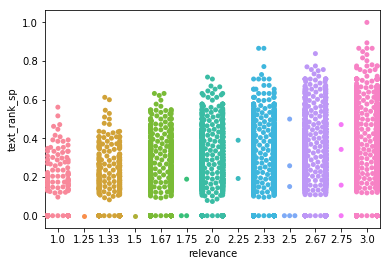

In [32]:
%matplotlib inline
import seaborn as sns
sns.swarmplot(x='relevance',y='text_rank_sp', data=df_all[:8000])

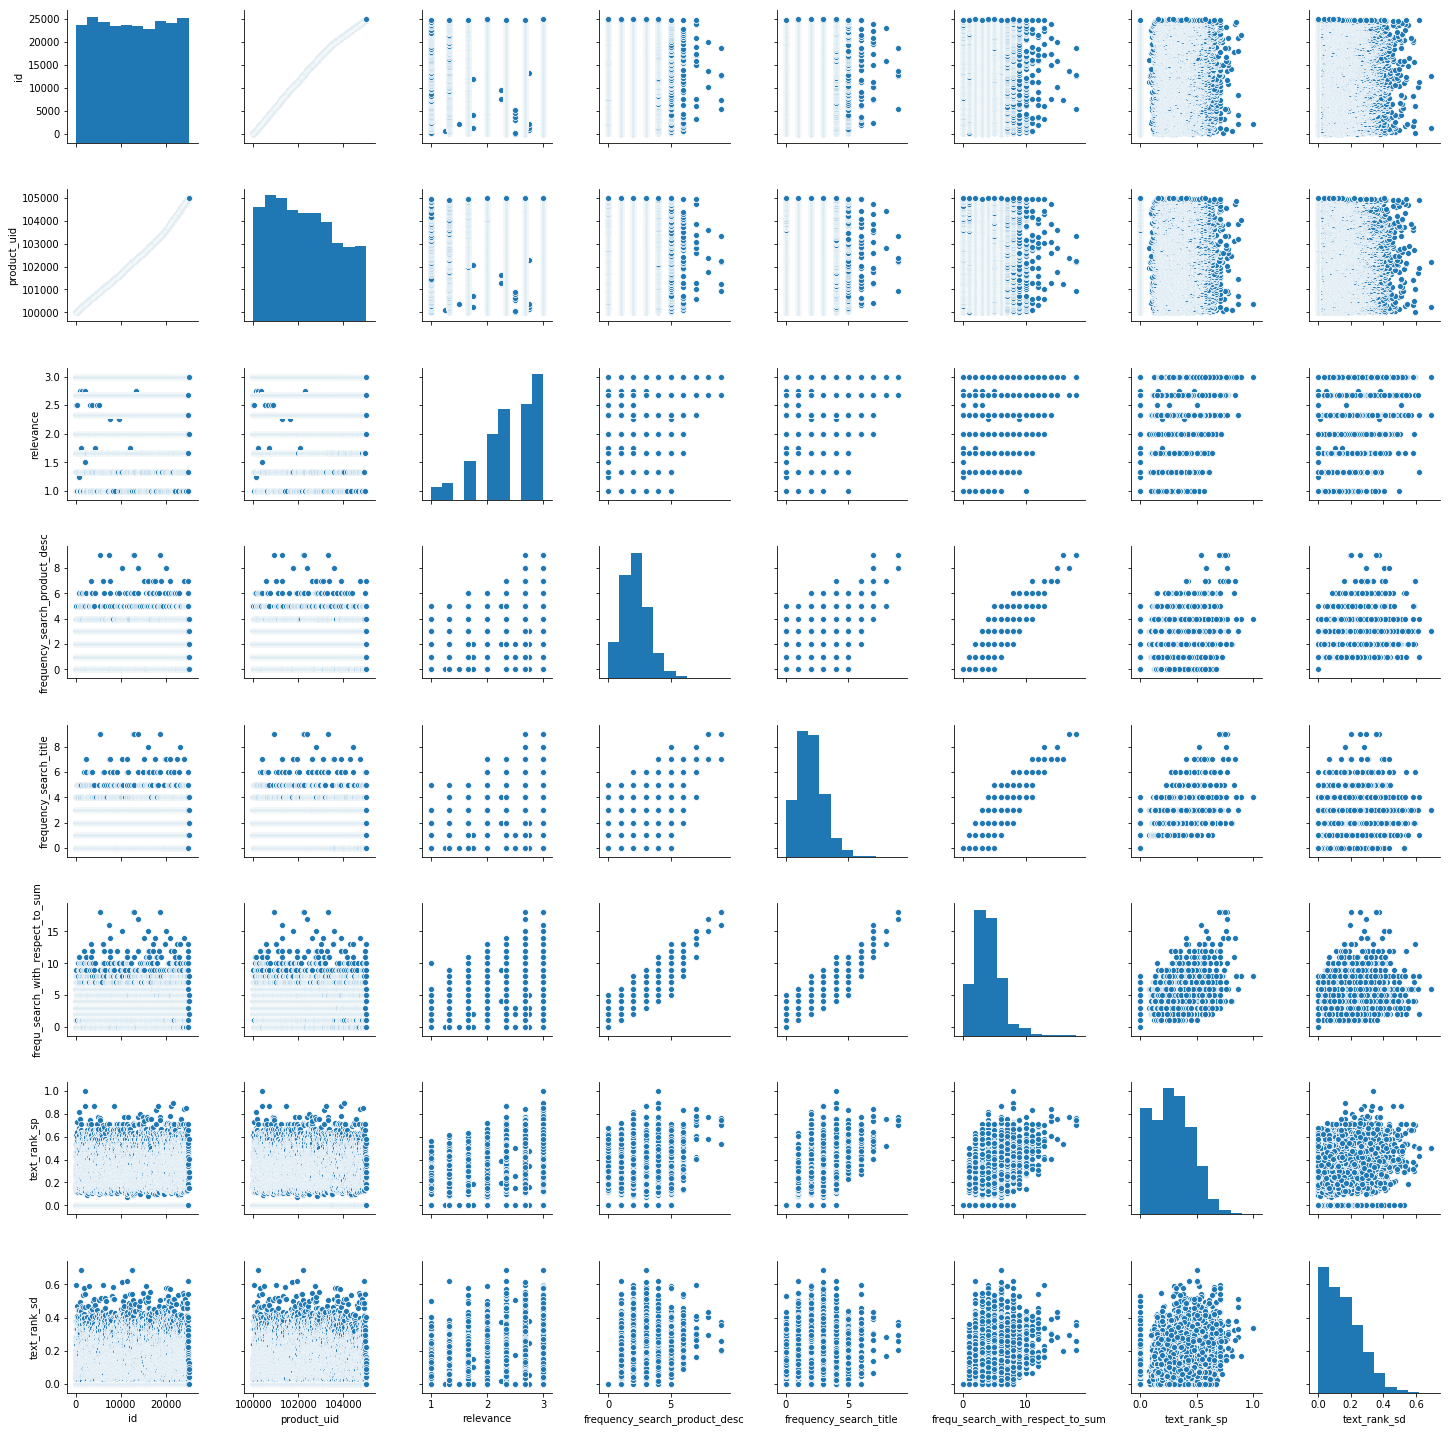

In [38]:
# (df_a.product_title.str.count("\\d+") + 1).hist(bins=30)#plot number of words in title
# (training_data.search_term.str.count("\\d+") + 1).hist(bins=30) #plot number of words in search query
# (df_all.relevance.value_counts()).hist(bins=30)

# sns.pairplot(df_all[:8000])

In [40]:
# from nltk.corpus import stopwords
# stop = stopwords.words('english')

# df_all['product_title_2'] = df_all['product_title'].apply(lambda x: len([x for x in x.split() if x in stop]))
# df_all['product_description_2'] = df_all['product_description'].apply(lambda x: len([x for x in x.split() if x in stop]))


In [41]:
# df_all['frequency_search_product_desc2'] = df_all.loc[:, ["search_term","product_description"]].apply(lambda row:str_common_word(*row), axis=1)
# df_all['frequency_search_title2'] = df_all.loc[:, ["search_term","product_title"]].apply(lambda row:str_common_word(*row), axis=1)

# df_all['frequ_search_with_respect_to_sum2'] = df_all.loc[:, ["frequency_search_product_desc","frequency_search_title"]].apply(lambda row:row[0]+row[1], axis=1)


In [48]:
# df_all["text_rank_sp2"] = df_all.loc[:, ["search_term","product_title"]].apply(lambda x: sentence_similarity(*x), axis=1)
# df_all["text_rank_sd2"] = df_all.loc[:, ["search_term","product_description"]].apply(lambda x: sentence_similarity(*x), axis=1)
# df_all = df_all.drop(['text_rank_sd2','text_rank_sp2','frequency_search_title2','frequency_search_product_desc2', 'frequ_search_with_respect_to_sum2','product_title_2','product_description_2'],axis=1)

In [45]:
df_all.head(3)

id      ...      text_rank_sd2
0   2      ...           0.138972
1   3      ...           0.000000
2   9      ...           0.108679

[3 rows x 18 columns]

In [ ]:
import seaborn as sns
sns.swarmplot(x='relevance',y='text_rank_sp', data=df_all[:8000])

In [50]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

In [51]:
# df_all['search_term_avg'] = df_all['search_term'].apply(lambda x: avg_word(x))
# df_all['product_description_avg'] = df_all['product_description'].apply(lambda x: avg_word(x))
# df_all['product_title_avg'] = df_all['product_title'].apply(lambda x:avg_word(x))

In [52]:
df_all.corr()

id        ...          product_title_avg
id                                1.000000        ...                  -0.021098
product_uid                       0.984194        ...                  -0.017691
relevance                        -0.116426        ...                   0.036796
frequency_search_product_desc     0.034874        ...                  -0.061263
frequency_search_title            0.132697        ...                  -0.082622
frequ_search_with_respect_to_sum  0.090239        ...                  -0.077550
text_rank_sp                      0.124237        ...                   0.018054
text_rank_sd                      0.011283        ...                  -0.051787
search_term_avg                  -0.014645        ...                   0.275827
product_description_avg          -0.001278        ...                   0.160545
product_title_avg                -0.021098        ...                   1.000000

[11 rows x 11 columns]

In [53]:
df_all[df_all.product_title_avg<1].head(3)

Empty DataFrame
Columns: [id, product_title, product_uid, relevance, search_term, product_description, frequency_search_product_desc, frequency_search_title, frequ_search_with_respect_to_sum, text_rank_sp, text_rank_sd, search_term_avg, product_description_avg, product_title_avg]
Index: []

In [62]:
model_data = df_all.drop(['search_term','product_title','product_description', 'frequ_search_with_respect_to_sum','distance_levistein'],axis=1)
model_data.head(3)


id        ...          product_title_avg
0   2        ...                   4.333333
1   3        ...                   4.333333
2   9        ...                   4.916667

[3 rows x 10 columns]

In [59]:
from nltk.metrics import edit_distance
from sklearn.preprocessing import StandardScaler


In [64]:

# df_train = model_data.iloc[:num_train]
# print('df_train',df_train)
# df_test = model_data.iloc[num_train:]
# print('df_test',df_test)
# id_test = df_test['id']

# y_train = df_train['relevance'].values
# X_train = df_train.drop(['id','relevance'],axis=1).values
# X_test = df_test.drop(['id','relevance'],axis=1).values

# #### Feature to the same scale
# scX = StandardScaler()
# X_train = scX.fit_transform(X_train)
# X_test = scX.fit_transform(X_test)

# rf = RandomForestRegressor(n_estimators=4, max_depth=6, random_state=0)
# clf = BaggingRegressor(rf, n_estimators=4, max_samples=0.1, random_state=25)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

# pd.DataFrame({"id": id_test, "relevance": y_pred}).to_csv('submission.csv',index=False)

df_train            id        ...          product_title_avg
0           2        ...                   4.333333
1           3        ...                   4.333333
2           9        ...                   4.916667
3          16        ...                   4.500000
4          17        ...                   4.500000
5          18        ...                   5.692308
6          20        ...                   5.692308
7          21        ...                   5.692308
8          23        ...                   4.900000
9          27        ...                   3.727273
10         34        ...                   5.000000
11         35        ...                   5.058824
12         37        ...                   5.058824
13         38        ...                   5.058824
14         48        ...                   4.461538
15         51        ...                   6.125000
16         65        ...                   4.583333
17         69        ...                   5.600000
18 

In [60]:
df_all.corr()

id         ...          distance_levistein
id                                1.000000         ...                    0.004298
product_uid                       0.984194         ...                    0.003932
relevance                        -0.116426         ...                   -0.044545
frequency_search_product_desc     0.034874         ...                    0.002998
frequency_search_title            0.132697         ...                    0.077581
frequ_search_with_respect_to_sum  0.090239         ...                    0.043364
text_rank_sp                      0.124237         ...                   -0.213408
text_rank_sd                      0.011283         ...                   -0.111796
search_term_avg                  -0.014645         ...                   -0.017456
product_description_avg          -0.001278         ...                    0.091224
product_title_avg                -0.021098         ...                   -0.024873
distance_levistein                0.004298         ...                    1.000000

[12 rows x 12 columns]

stemming


In [8]:
import string
import re
import nltk


ps = nltk.stem.PorterStemmer()
wn = nltk.WordNetLemmatizer()

stopwords = nltk.corpus.stopwords.words('english')

def remove_punctuation(text):
    txt = ''.join(character for character in text if character not in string.punctuation)
    return txt

def tokenization(text, stopwords = None):
    tokens = re.split('\W+', text)
    if stopwords:
        tokens = [token for token in tokens if token not in stopwords]
    return tokens
        
    
def stemming(tokens):
    new_tokens = list(map(ps.stem, tokens))
#     new_tokens = [ps.stem(token) for token in tokens]
    return new_tokens

def lemmatizing(tokens):
    new_tokens = list(map(wn.lemmatize, tokens))
    return new_tokens

def result(txt):
    txt1 = remove_punctuation(txt)
    txt1 = tokenization(txt1)
#     txt1 = stemming(txt1)
    txt1 = lemmatizing(txt1)


    return txt1
# _____________





In [5]:
# df_all['search_term_tokens'] = df_all['search_term'].apply(lambda row:result(row))
# df_all['product_description_tokens'] = df_all['product_description'].apply(lambda row:result(row))


In [118]:
from collections import defaultdict

def make_statistics(phrase):
    phrase = remove_punctuation(phrase)
    stats = dict()
    text = nltk.word_tokenize(phrase)
    
    for word, part_of_speach in nltk.pos_tag(text):
        if part_of_speach in stats:
            stats[part_of_speach] += 1
        else:
            stats[part_of_speach] = 1
    return stats

In [28]:
# df_all['parts_stats_in_sq'] = df_all.loc[:,['search_term']].apply(lambda x: make_statistics(x), axis=1)

In [119]:
# df_all['parts_stats_in_desc'] = df_all.loc[:,['product_description']].apply(lambda x: make_statistics(x), axis=1)

KeyboardInterrupt: 

In [ ]:
df_all['parts_stats_in_prod_title'] = df_all.loc[:,['product_title']].apply(lambda x: make_statistics(x), axis=1)

In [22]:
tokenization(a[0])

['angle', 'bracket']

In [69]:
df_all[df_all.relevance > 2]

id                                      product_title  product_uid  \
0           2                  Simpson Strong-Tie 12-Gauge Angle       100001   
1           3                  Simpson Strong-Tie 12-Gauge Angle       100001   
2           9  BEHR Premium Textured DeckOver 1-gal. #SC-141 ...       100002   
3          16  Delta Vero 1-Handle Shower Only Faucet Trim Ki...       100005   
4          17  Delta Vero 1-Handle Shower Only Faucet Trim Ki...       100005   
5          18  Whirlpool 1.9 cu. ft. Over the Range Convectio...       100006   
6          20  Whirlpool 1.9 cu. ft. Over the Range Convectio...       100006   
7          21  Whirlpool 1.9 cu. ft. Over the Range Convectio...       100006   
8          23  Lithonia Lighting Quantum 2-Light Black LED Em...       100007   
9          27  House of Fara 3/4 in. x 3 in. x 8 ft. MDF Flut...       100009   
10         34       Valley View Industries Metal Stakes (4-Pack)       100010   
11         35  Toro Personal Pace Recycler 22 in. Variable Sp...       100011   
12         37  Toro Personal Pace Recycler 22 in. Variable Sp...       100011   
14         48  Hampton Bay Caramel Simple Weave Bamboo Rollup...       100012   
15         51  InSinkErator SinkTop Switch Single Outlet for ...       100013   
16         65  Sunjoy Calais 8 ft. x 5 ft. x 8 ft. Steel Tile...       100016   
19         81  MD Building Products 36 in. x 36 in. Cloverlea...       100017   
20         85  MD Building Products 36 in. x 36 in. Cloverlea...       100017   
22         90  House of Fara 8 Linear ft. MDF Overlapping Wai...       100019   
23         92  House of Fara 8 Linear ft. MDF Overlapping Wai...       100019   
25        105  House of Fara 8 Linear ft. MDF Overlapping Wai...       100019   
26        106  House of Fara 8 Linear ft. MDF Overlapping Wai...       100019   
28        114  1804 Dual Spray Half Pattern 4 in Pop-Up Spray...       100021   
29        117  Samsung 4.2 cu. ft. Front Load Washer with Ste...       100022   
31        122  Samsung 4.2 cu. ft. Front Load Washer with Ste...       100022   
32        123           Quikrete 80 lb. Crack-Resistant Concrete       100023   
36        138  Nantucket Pavers Patio-on-a-Pallet 10 ft. x 10...       100026   
37        143         UltraTouch 48 in. x 24 ft. Radiant Barrier       100027   
39        149  Backyard X-Scapes 6 ft. H. x 16 ft. L Reed Fen...       100028   
41        157  Backyard X-Scapes 6 ft. H. x 16 ft. L Reed Fen...       100028   
...       ...                                                ...          ...   
74012  221312  Nantucket Pavers Ledgestone 47 in. Concrete Fi...       206517   
74015  221327  GE 30 in. Single Electric Wall Oven Self-Clean...       206532   
74017  221330  Schlage Accent Satin Nickel Right-Hand Dummy L...       206535   
74018  221332  Safavieh Lyndhurst White / Black 7 ft. x 7 ft....       206536   
74019  221334        National Hardware 8-3/4 in. Ornamental Pull       206538   
74020  221337             DANCO 8 in. Universal Plastic Ballcock       206541   
74022  221344  Freeman Flooring Nailer Drive Blade Replacemen...       206547   
74024  221349  Vinotemp 46-Bottle Dual-Zone Wine Cooler in Bl...       206551   
74025  221350  Veranda 4 ft. x 6 ft. Sand Vinyl Un-Assembled ...       206552   
74026  221355             Heath Zenith Wired Lighted Push Button       206557   
74027  221364      ZEP 64 oz. Organic Drain and Disposal Cleaner       206563   
74029  221373  Leviton 2-Gang Midway Duplex Outlet Nylon Wall...       206569   
74032  221390               Everbilt Black Self-Closing Gate Kit       206580   
74034  221395  Ceramic Tile 1.5 in. x 6 in. Black Orleans Spacer       206585   
74039  221401    Crosley LaFayette Low Profile TV Stand in Black       206590   
74040  221404  Rust-Oleum Automotive 8 oz. Special White Auto...       206593   
74041  221405  Foremost Tides 33 in. to 35 in. x 65 in. Frame...       206594   
74043  221408  Home Fashion Technologies 1

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='news_category', y="sentiment_score", 
                   hue='news_category', data=df, ax=ax1)
bp = sns.boxplot(x='news_category', y="sentiment_score", 
                 hue='news_category', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing News Sentiment', fontsize=14)

KeyboardInterrupt: 

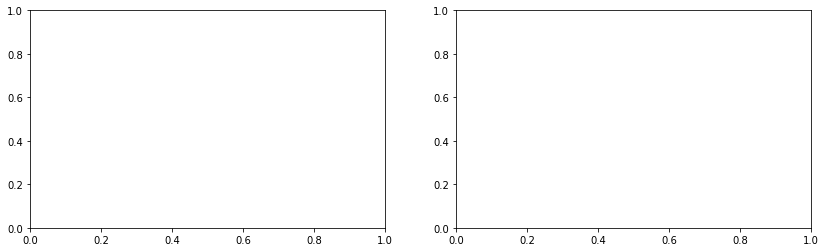

In [36]:
%matplotlib inline
import seaborn as sns

import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='product_title', y="relevance", 
                   hue='product_title', data=df_all, ax=ax1)

bp = sns.boxplot(x='product_title', y="relevance", 
                 hue='product_title', data=df_all, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing relevancy score', fontsize=14)

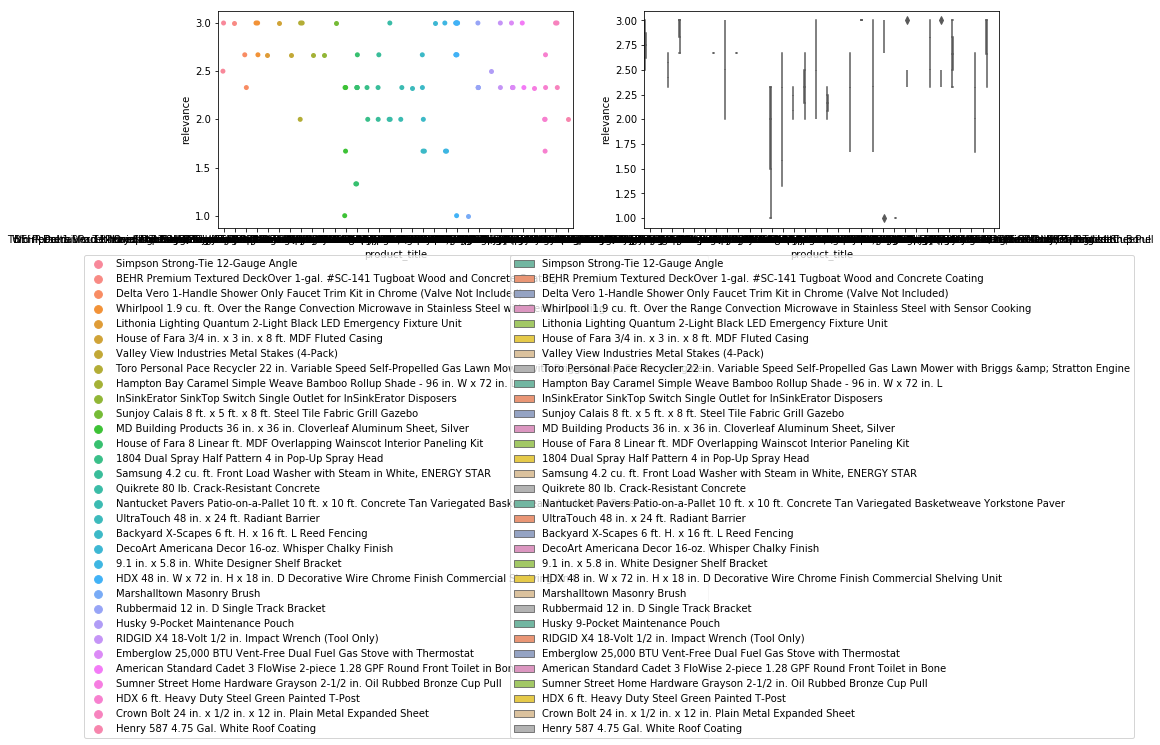

In [55]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='product_title', y="relevance", 
                   hue='product_title', data=df_all[:80], ax=ax1)

sp.legend(loc=9, bbox_to_anchor=(0.5, -0.1))



bp = sns.boxplot(x='product_title', y="relevance", 
                 hue='product_title', data=df_all[:80], palette="Set2", ax=ax2)

plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
# plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)


# t = f.suptitle('Visualizing relevancy score', fontsize=14)

In [49]:
df_all.groupby(by=['product_title','relevance'])[:10]

TypeError: unhashable type: 'slice'

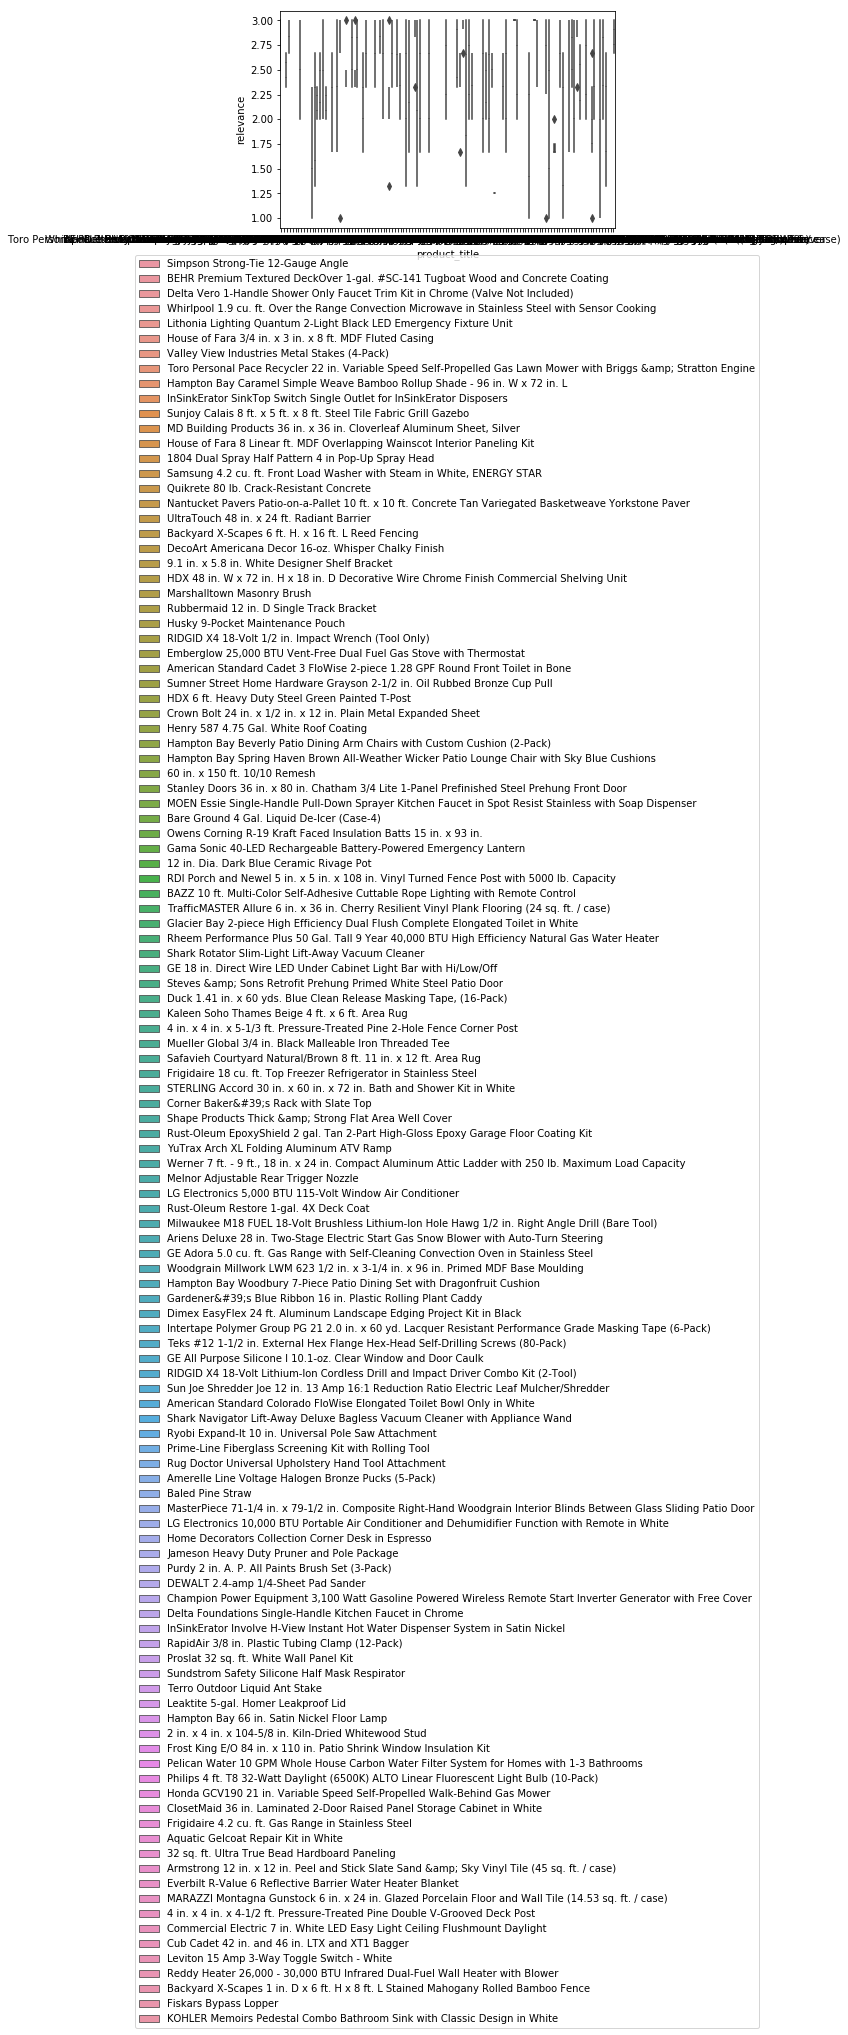

In [65]:
import seaborn as sns

sns.boxplot(x='product_title', y="relevance", 
                   hue='product_title', data=df_all[:300])

plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))



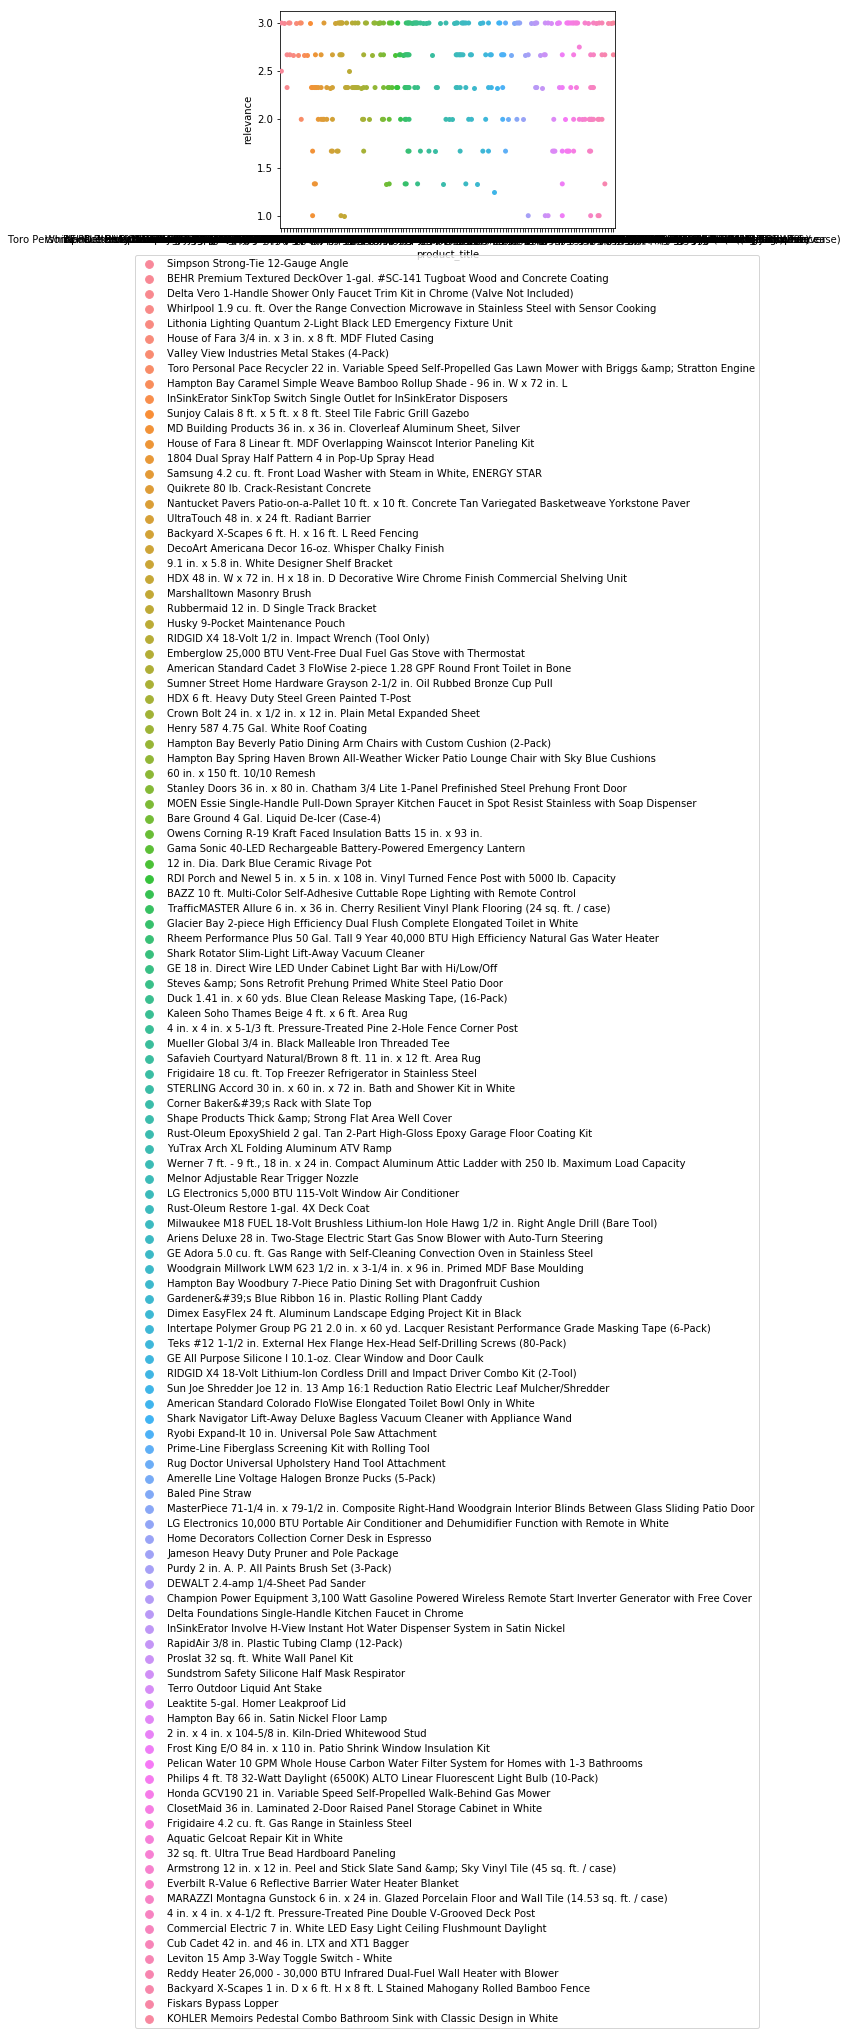

In [67]:
sns.swarmplot(x='product_title', y="relevance", 
                   hue='product_title', data=df_all[:300])
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

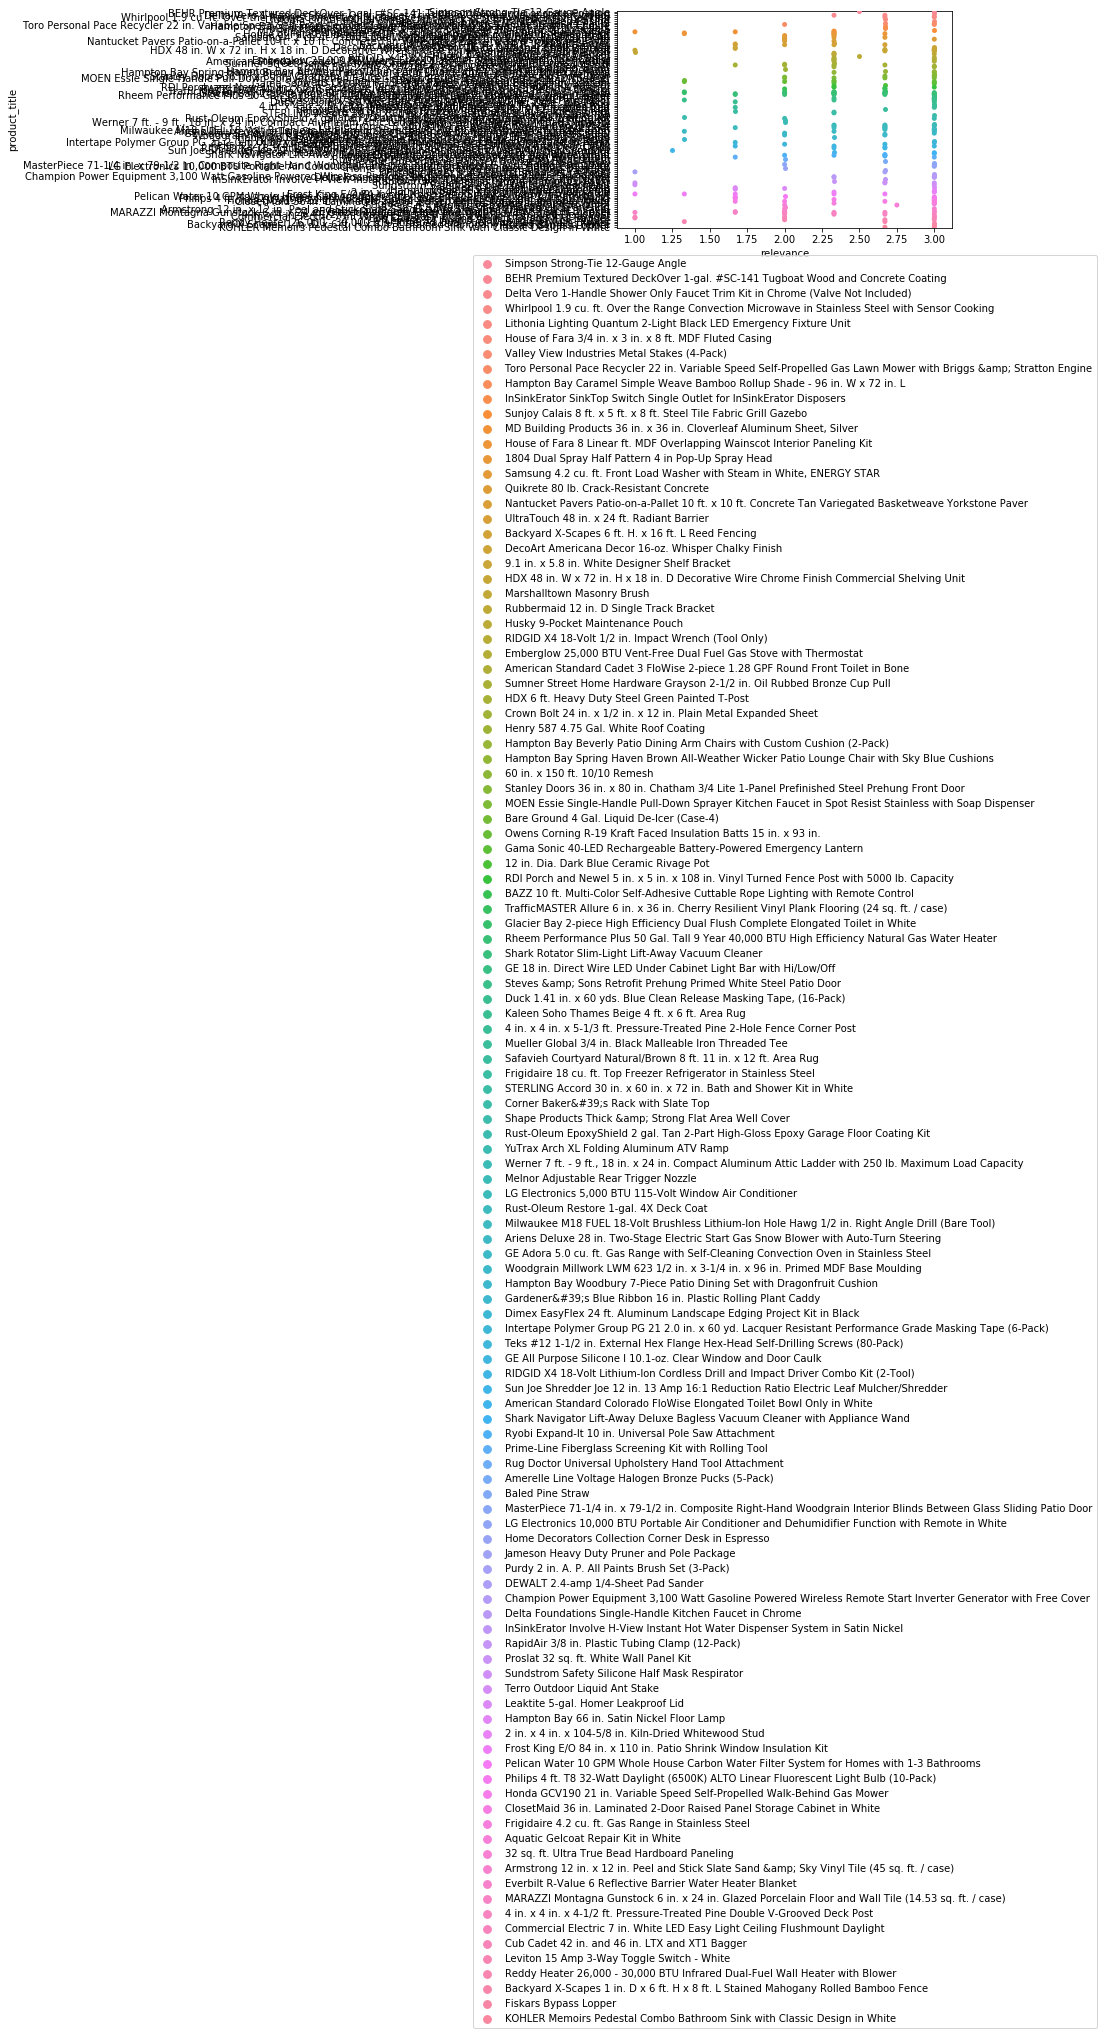

In [68]:
sns.swarmplot(y='product_title', x="relevance", 
                   hue='product_title', data=df_all[:300])
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

In [70]:
df_all.relevance.describe()

count    74067.000000
mean         2.381634
std          0.533984
min          1.000000
25%          2.000000
50%          2.330000
75%          3.000000
max          3.000000
Name: relevance, dtype: float64

In [72]:
df_all.relevance.median()

2.33

In [73]:
df_test

id  product_uid  \
0            1       100001   
1            4       100001   
2            5       100001   
3            6       100001   
4            7       100001   
5            8       100001   
6           10       100003   
7           11       100003   
8           12       100003   
9           13       100004   
10          14       100005   
11          15       100005   
12          19       100006   
13          22       100006   
14          24       100008   
15          25       100009   
16          26       100009   
17          28       100010   
18          29       100010   
19          30       100010   
20          31       100010   
21          32       100010   
22          33       100010   
23          36       100011   
24          39       100011   
25          40       100011   
26          41       100011   
27          42       100011   
28          43       100011   
29          44       100011   
...        ...          ...   
166663  240731       224399   
166664  240732       224400   
166665  240733       224401   
166666  240734       224402   
166667  240735       224403   
166668  240736       224404   
166669  240737       224405   
166670  240738       224406   
166671  240739       224407   
166672  240740       224408   
166673  240741       224409   
166674  240742       224410   
166675  240743       224411   
166676  240744       224412   
166677  240745       224413   
166678  240746       224414   
166679  240747       224415   
166680  240748       224416   
166681  240749       224417   
166682  240750       224418   
166683  240751       224419   
166684  240752       224420   
166685  240753       224421   
166686  240754       224422   
166687  240755       224423   
166688  240756       224424   
166689  240757       224425   
166690  240758       224426   
166691  240759       224427   
166692  240760       224428   

                                            product_title  \
0                       Simpson Strong-Tie 12-Gauge Angle   
1                       Simpson Strong-Tie 12-Gauge Angle   
2                       Simpson Strong-Tie 12-Gauge Angle   
3                       Simpson Strong-Tie 12-Gauge Angle   
4                       Simpson Strong-Tie 12-Gauge Angle   
5                       Simpson Strong-Tie 12-Gauge Angle   
6       STERLING Ensemble 33-1/4 in. x 60 in. x 75-1/4...   
7       STERLING Ensemble 33-1/4 in. x 60 in. x 75-1/4...   
8       STERLING Ensemble 33-1/4 in. x 60 in. x 75-1/4...   
9       Grape Solar 265-Watt Polycrystalline Solar Pan...   
10      Delta Vero 1-Handle Shower Only Faucet Trim Ki...   
11      Delta Vero 1-Handle Shower Only Faucet Trim Ki...   
12      Whirlpool 1.9 cu. ft. Over the Range Convectio...   
13      Whirlpool 1.9 cu. ft. Over the Range Convectio...   
14      Teks #10 1-1/2 in. External Hex Flange Hex-Hea...   
15      House of Fara 3/4 in. x 3 in. x 8 ft. MDF Flut...   
16      House of Fara 3/4 in. x 3 in. x 8 ft. MDF Flut...   
17           Valley View Industries Metal Stakes (4-Pack)   
18           Valley View Industries Metal Stakes (4-Pack)   
19           Valley View Industries Metal Stakes (4-Pack)   
20           Valley View Industries Metal Stakes (4-Pack)   
21           Valley View Industries Metal Stakes (4-Pack)   
22           Valley View Industries Metal Stakes (4-Pack)   
23      Toro Personal Pace Recycler 22 in. Variable Sp...   
24      Toro Personal Pace Recycler 22 in. Variable Sp...   
25      Toro Personal Pace Recycler 22 in. Variable Sp...   
26      Toro Personal Pace Recycler 22 in. Variable Sp...   
27      Toro Personal Pace Recycler 22 in. Variable Sp...   
28      Toro Personal Pace Recycler 22 in. Variable Sp...   
29      Toro Personal Pace Recycler 22 in. Variable Sp...   
...                                                   ...   
166663                      6-Panel Composite Bifold Door   
166664     Eaton CSR 200-Amp Double Pole Main Breaker Kit   
166665  Crown B

In [79]:
r = df_all[df_all['relevance'] < 1.5]
r.values()

TypeError: 'numpy.ndarray' object is not callable

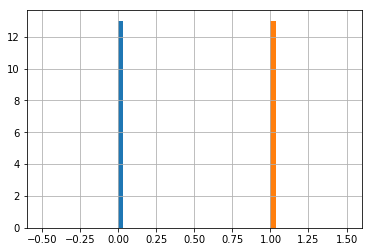

In [82]:
(df_all.relevance.value_counts() <= 1.5).hist(bins=30)
(df_all.relevance.value_counts() > 1.5).hist(bins=30)

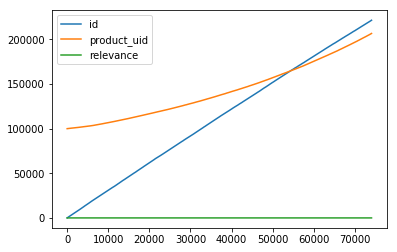

In [87]:
df_all[df_all.relevance > 0].plot()

In [88]:
df_all['len_query'] = df_all.search_term.str.len()

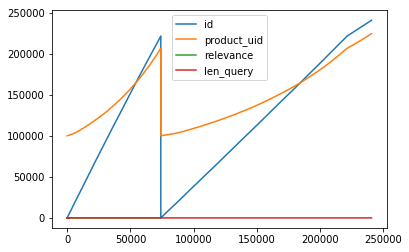

In [90]:
df_all.plot()

/Users/iurii/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/iurii/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


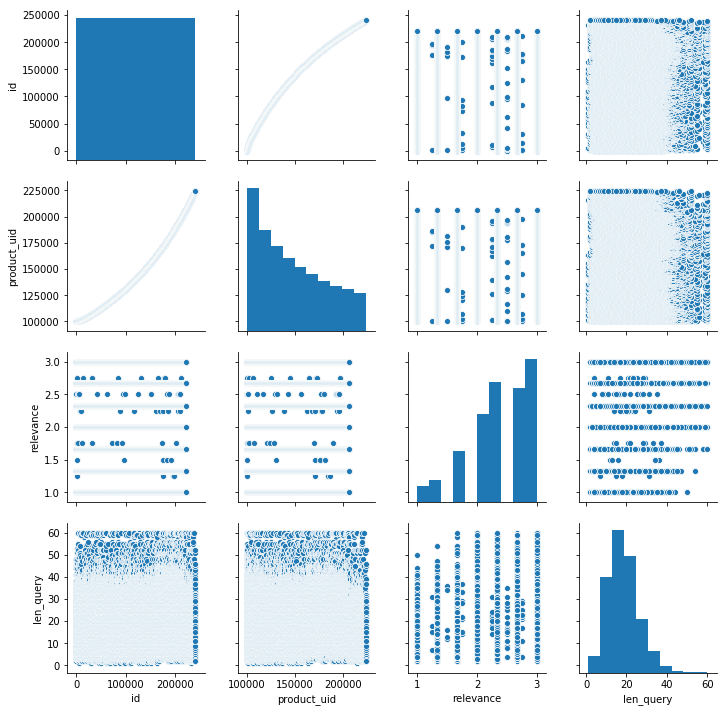

In [91]:
sns.pairplot(df_all)

In [92]:
df_all.corr()

id  product_uid  relevance  len_query
id           1.000000     0.984194  -0.116426   0.092231
product_uid  0.984194     1.000000  -0.130656   0.083166
relevance   -0.116426    -0.130656   1.000000  -0.048761
len_query    0.092231     0.083166  -0.048761   1.000000

In [93]:
df_all['len_query_over_1'] = df_all['len_query'].apply(lambda x:1/x)

In [94]:
df_all.corr()

id  product_uid  relevance  len_query  \
id                1.000000     0.984194  -0.116426   0.092231   
product_uid       0.984194     1.000000  -0.130656   0.083166   
relevance        -0.116426    -0.130656   1.000000  -0.048761   
len_query         0.092231     0.083166  -0.048761   1.000000   
len_query_over_1 -0.063043    -0.054814  -0.021721  -0.739732   

                  len_query_over_1  
id                       -0.063043  
product_uid              -0.054814  
relevance                -0.021721  
len_query                -0.739732  
len_query_over_1          1.000000

In [97]:
df_all['len_query_tg'] = 1+np.tanh(df_all['len_query_over_1'])

In [104]:
df_all['test']=np.log(df_all['len_query'])

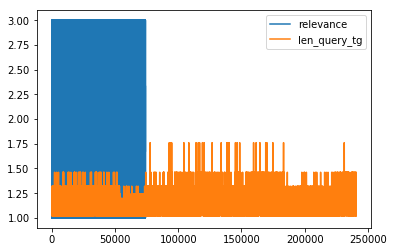

In [107]:
df_all[['relevance','len_query_tg']].plot()

In [105]:
df_all.corr()

id  product_uid  relevance  len_query  \
id                1.000000     0.984194  -0.116426   0.092231   
product_uid       0.984194     1.000000  -0.130656   0.083166   
relevance        -0.116426    -0.130656   1.000000  -0.048761   
len_query         0.092231     0.083166  -0.048761   1.000000   
len_query_over_1 -0.063043    -0.054814  -0.021721  -0.739732   
len_query_tg     -0.064651    -0.056175  -0.019970  -0.757595   
test              0.085317     0.075604  -0.024464   0.945782   

                  len_query_over_1  len_query_tg      test  
id                       -0.063043     -0.064651  0.085317  
product_uid              -0.054814     -0.056175  0.075604  
relevance                -0.021721     -0.019970 -0.024464  
len_query                -0.739732     -0.757595  0.945782  
len_query_over_1          1.000000      0.998089 -0.902294  
len_query_tg              0.998089      1.000000 -0.917274  
test                     -0.902294     -0.917274  1.000000

In [110]:
def extract_noun(x):
    if 'NN' in x:
        return x['NN']
    return 0

df_all['number_of_nouns'] = df_all['parts_stats_in_sq'].apply(extract_noun)

In [112]:
df_all.corr()

id  product_uid  relevance  len_query  \
id                1.000000     0.984194  -0.116426   0.092231   
product_uid       0.984194     1.000000  -0.130656   0.083166   
relevance        -0.116426    -0.130656   1.000000  -0.048761   
len_query         0.092231     0.083166  -0.048761   1.000000   
len_query_over_1 -0.063043    -0.054814  -0.021721  -0.739732   
len_query_tg     -0.064651    -0.056175  -0.019970  -0.757595   
test              0.085317     0.075604  -0.024464   0.945782   
number_of_nouns   0.054262     0.049996  -0.032947   0.471501   

                  len_query_over_1  len_query_tg      test  number_of_nouns  
id                       -0.063043     -0.064651  0.085317         0.054262  
product_uid              -0.054814     -0.056175  0.075604         0.049996  
relevance                -0.021721     -0.019970 -0.024464        -0.032947  
len_query                -0.739732     -0.757595  0.945782         0.471501  
len_query_over_1          1.000000      0.998089 -0.902294        -0.367686  
len_query_tg              0.998089      1.000000 -0.917274        -0.376688  
test                     -0.902294     -0.917274  1.000000         0.457773  
number_of_nouns          -0.367686     -0.376688  0.457773         1.000000

In [113]:
df_all[df_all.search_term.str.contains('^\w+')].corr()

id  product_uid  relevance  len_query  \
id                1.000000     0.984193  -0.116366   0.092280   
product_uid       0.984193     1.000000  -0.130605   0.083211   
relevance        -0.116366    -0.130605   1.000000  -0.048895   
len_query         0.092280     0.083211  -0.048895   1.000000   
len_query_over_1 -0.063049    -0.054817  -0.021626  -0.739741   
len_query_tg     -0.064658    -0.056178  -0.019872  -0.757607   
test              0.085344     0.075626  -0.024598   0.945785   
number_of_nouns   0.054194     0.049919  -0.033039   0.471522   

                  len_query_over_1  len_query_tg      test  number_of_nouns  
id                       -0.063049     -0.064658  0.085344         0.054194  
product_uid              -0.054817     -0.056178  0.075626         0.049919  
relevance                -0.021626     -0.019872 -0.024598        -0.033039  
len_query                -0.739741     -0.757607  0.945785         0.471522  
len_query_over_1          1.000000      0.998088 -0.902297        -0.367603  
len_query_tg              0.998088      1.000000 -0.917278        -0.376605  
test                     -0.902297     -0.917278  1.000000         0.457719  
number_of_nouns          -0.367603     -0.376605  0.457719         1.000000

In [115]:
def extract_vb(x):
    if 'VB' in x:
        return x['VB']
    return 0

df_all['number_of_verbs'] = df_all['parts_stats_in_sq'].apply(extract_vb)

In [25]:
df_all.corr()

id  product_uid  relevance
id           1.000000     0.984194  -0.116426
product_uid  0.984194     1.000000  -0.130656
relevance   -0.116426    -0.130656   1.000000

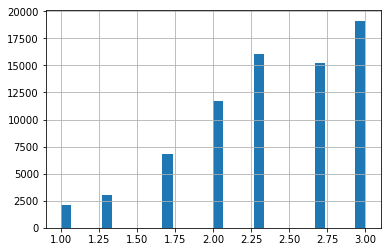

In [27]:
%matplotlib inline

df_all.relevance.hist(bins=30)

In [ ]:
df_all['parts_stats_in_desc'] = df_all.loc[:,['product_description']].apply(lambda x: make_statistics(x), axis=1)